# Quickstart
* [tutorial](http://lightkurve.keplerscience.org/tutorials/1.02-target-pixel-files.html)

To install the forked version of lightkurve with a simple patch:

In [1]:
import getpass
uname = getpass.getuser()

if uname == 'prometheus' or uname == 'jp':
    data_dir = '/home/'+uname+'/data/transit/c16-tpf/'
elif uname == 'muscat':
    data_dir = '/home/'+uname+'/data/Jerome/'
else: 
    data_dir = '.'

In [2]:
import matplotlib.pyplot as pl
%matplotlib inline

import os
from glob import glob
import numpy as np
from astropy.io import fits
import pandas as pd

In [3]:
file_list = glob(data_dir+'/Yu2018candidates/*.fits')
file_list.sort()
len(file_list)

32

In [4]:
fname = file_list[-1]

rec_array = fits.open(fname)
rec_array.info()

Filename: /home/muscat/data/Jerome//Yu2018candidates/ktwo251319382-unofficial-tpf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  TARGETTABLES    1 BinTableHDU    284   3888R x 12C   [D, E, J, 156J, 156E, 156E, 156E, 156E, 156E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (12, 13)   int32   


In [8]:
import sys
sys.path.append('../K2tools')
from utils import *

In [9]:
from lightkurve import KeplerTargetPixelFile

tpf = KeplerTargetPixelFile(fname, quality_bitmask='hardest')

times = tpf.time
fluxes = tpf.flux

aper_rad = 4
#masks
irregular_mask = make_mask(fluxes,cutoff_limit=1.0,shape='irregular')
round_mask  = make_mask(fluxes,rad=aper_rad,shape='round')
square_mask = make_mask(fluxes,rad=aper_rad,shape='square')

no_mask = make_mask(fluxes,shape='all')

# Multiple apertures

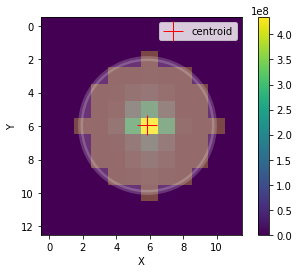

In [10]:
make_mask(fluxes, shape='round', rad=4, showfig=True);

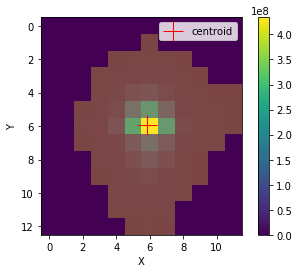

In [11]:
make_mask(fluxes, shape='irregular', rad=4, showfig=True);

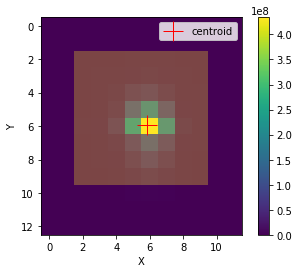

In [12]:
make_mask(fluxes, shape='square', rad=4, showfig=True);

In [10]:
fname = file_list[0]
radii = np.arange(3,6,1)
shape = 'round'
sigma = 5
fwin  = 301
cwin  = 51
limit = 1.0
order = 4
tol   = 5.0
save  = False

flux_per_r, aper_mask = tpf2lc(fname, radii, aper_shape=shape,
                          outlier_sigma=sigma, flat_window=fwin, corr_window=cwin,
                          cutoff_limit=limit, polyorder=order, break_tolerance=tol,
                          save_as_tpf=True)

  0%|          | 0/51 [00:00<?, ?it/s]

Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:05<00:00,  8.96it/s]


Saved: 211397844_test.fits


In [11]:
flux_per_r.keys()

dict_keys([3, 4, 5])

In [12]:
#time, flux, flux_err
flux_per_r[3]

(array([3262.46669148, 3263.30454375, 3262.48712679, ..., 3341.98107698,
        3342.00151196, 3342.02194683]),
 array([1.        , 1.00019721, 1.00003833, ..., 1.00041374, 0.99986619,
        1.00011206]),
 array([0.00391849, 0.00391334, 0.00391462, ..., 0.00432009, 0.00431705,
        0.00431259]))

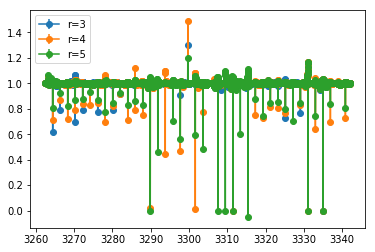

In [15]:
for i in flux_per_r:
    t = flux_per_r[i][0]
    f = flux_per_r[i][1]
    ferr = flux_per_r[i][2]
    
    pl.errorbar(t,f,yerr=ferr,marker='o',label='r={}'.format(i))
    pl.legend()

In [16]:
for fname in file_list:
    epic = fname.split('/')[-1].split('-')[0][4:]
    try:
        print('EPIC {}'.format(epic))
        flux_per_r, aper_mask = tpf2lc(fname, radii, aper_shape=shape,
                          outlier_sigma=sigma, flat_window=fwin, corr_window=cwin,
                          cutoff_limit=limit, polyorder=order, break_tolerance=tol,
                          save_as_tpf=True)
    except Exception as e:
        print('---skipping EPIC {} because\n{}\n---'.format(epic,e))

  0%|          | 0/51 [00:00<?, ?it/s]

EPIC 211397844
Aperture photometry with r=[3 4 5] and round mask...



  0%|          | 0/51 [00:00<?, ?it/s]

---skipping EPIC 211397844 because
File '211397844_test.fits' already exists.
---
EPIC 211502222
Aperture photometry with r=[3 4 5] and round mask...



  0%|          | 0/51 [00:00<?, ?it/s]

Saved: 211502222_test.fits
EPIC 211529065
Aperture photometry with r=[3 4 5] and round mask...



  0%|          | 0/51 [00:00<?, ?it/s]

Saved: 211529065_test.fits
EPIC 211533633
Aperture photometry with r=[3 4 5] and round mask...



 49%|████▉     | 25/51 [00:02<00:03,  7.49it/s]/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:595: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:598: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:155: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:156: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value



---skipping EPIC 211533633 because
zero-size array to reduction operation minimum which has no identity
---
EPIC 211552050
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:09<00:00,  5.93it/s]


Saved: 211552050_test.fits
EPIC 211631538
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:11<00:00,  5.61it/s]


Saved: 211631538_test.fits
EPIC 211638401
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:11<00:00,  3.69it/s]


Saved: 211638401_test.fits
EPIC 211647930
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:15<00:00,  3.73it/s]


Saved: 211647930_test.fits
EPIC 211649214
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:11<00:00,  5.12it/s]


Saved: 211649214_test.fits
EPIC 211673349
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:09<00:00,  5.57it/s]


Saved: 211673349_test.fits
EPIC 211730024
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:07<00:00,  6.33it/s]


Saved: 211730024_test.fits
EPIC 211741619
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:06<00:00,  7.36it/s]


Saved: 211741619_test.fits
EPIC 211812935
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:12<00:00,  3.86it/s]


Saved: 211812935_test.fits
EPIC 211816003
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:12<00:00,  3.86it/s]


Saved: 211816003_test.fits
EPIC 211919004
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:15<00:00,  2.69it/s]


Saved: 211919004_test.fits
EPIC 211945201
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:11<00:00,  4.18it/s]


Saved: 211945201_test.fits
EPIC 212036875
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:14<00:00,  2.01it/s]


Saved: 212036875_test.fits
EPIC 212040382
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:10<00:00,  5.01it/s]


Saved: 212040382_test.fits
EPIC 212041476
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:08<00:00,  6.22it/s]


Saved: 212041476_test.fits
EPIC 212058012
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:16<00:00,  4.38it/s]


Saved: 212058012_test.fits
EPIC 212069861
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:08<00:00,  6.41it/s]


Saved: 212069861_test.fits
EPIC 212072539
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:20<00:00,  4.32it/s]


Saved: 212072539_test.fits
EPIC 212081533
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:08<00:00,  5.74it/s]


Saved: 212081533_test.fits
EPIC 212099230
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:08<00:00,  5.38it/s]


Saved: 212099230_test.fits
EPIC 212110888
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:10<00:00,  5.37it/s]


Saved: 212110888_test.fits
EPIC 212154564
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:16<00:00,  4.19it/s]


Saved: 212154564_test.fits
EPIC 212178066
Aperture photometry with r=[3 4 5] and round mask...



/home/jp/github/transit/lightkurve2/src/lightkurve/lightkurve/lightcurve.py:249: RuntimeWarning: invalid value encountered in true_divide
  flatten_lc.flux = flatten_lc.flux / trend_signal
/home/jp/github/transit/lightkurve2/src/lightkurve/lightkurve/lightcurve.py:250: RuntimeWarning: invalid value encountered in true_divide
  flatten_lc.flux_err = flatten_lc.flux_err / trend_signal
  0%|          | 0/51 [00:00<?, ?it/s]/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/jp/github/transit/lightkurve2/src/lightkurve/lightkurve/correctors.py:377: RuntimeWarning: Degrees of freedom <= 0 for slice
  _, eig_vecs = linalg.eigh(np.cov(centroids))
/home/jp/miniconda3/envs/astroconda3

---skipping EPIC 212178066 because
array must not contain infs or NaNs
---
EPIC 212204403
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:08<00:00,  5.74it/s]


Saved: 212204403_test.fits
EPIC 212219881
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:20<00:00,  1.42s/it]


Saved: 212219881_test.fits
EPIC 251292838
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:06<00:00,  7.39it/s]


Saved: 251292838_test.fits
EPIC 251319382
Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 51/51 [00:09<00:00,  2.80it/s]


Saved: 251319382_test.fits


## Reading saved tpfs

In [17]:
new_tpfs = glob('test/*test.fits')
len(new_tpfs)

29

In [18]:
hdulist = fits.open(new_tpfs[0])
hdulist.info()

Filename: test/251319382_test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  TARGETTABLES    1 BinTableHDU    284   3888R x 12C   [D, E, J, 156J, 156E, 156E, 156E, 156E, 156E, J, E, E]   
  2  APERTURE      1 ImageHDU        61   (12, 13)   float64   
  3  ROUND_APER0    1 BinTableHDU     68   3848R x 3C   [D, D, D]   
  4  ROUND_APER1    1 BinTableHDU     69   3848R x 3C   [D, D, D]   
  5  ROUND_APER2    1 BinTableHDU     70   3852R x 3C   [D, D, D]   


In [19]:
data, hdr = read_tpf(new_tpfs[0],index=2)

In [20]:
data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])